# MICRO CREDIT DEFAULTER_ Project -1

## Importing the necessary libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None) #so that large dataframes can be seen in output clearly
import warnings
warnings.filterwarnings('ignore')

In [10]:
df1=pd.read_csv("MCL_data.csv",parse_dates=["pdate"]) # Importing the data

In [11]:
df1.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

## Features in the dataset and their description

1) label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

2) msisdn : mobile number of user

3) aon : age on cellular network in days

4) daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

5) daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

6) rental30: Average main account balance over last 30 days

7) rental90: Average main account balance over last 90 days

8) last_rech_date_ma: Number of days till last recharge of main account

9) last_rech_date_da: Number of days till last recharge of data account

10) last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)

11) cnt_ma_rech30: Number of times main account got recharged in last 30 days

12) fr_ma_rech30: Frequency of main account recharged in last 30 days

13) sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

14) medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

15) medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

16) cnt_ma_rech90: Number of times main account got recharged in last 90 days

17) fr_ma_rech90: Frequency of main account recharged in last 90 days

18) sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indian Rupee)

19) medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)

20) medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)

21) cnt_da_rech30: Number of times data account got recharged in last 30 days

22) fr_da_rech30: Frequency of data account recharged in last 30 days

23) cnt_da_rech90: Number of times data account got recharged in last 90 days

24) fr_da_rech90: Frequency of data account recharged in last 90 days

25) cnt_loans30: Number of loans taken by user in last 30 days

26) amnt_loans30: Total amount of loans taken by user in last 30 days

27) maxamnt_loans30: maximum amount of loan taken by the user in last 30 days

28) medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days

29) cnt_loans90: Number of loans taken by user in last 90 days

30) amnt_loans90: Total amount of loans taken by user in last 90 days

31) maxamnt_loans90: maximum amount of loan taken by the user in last 90 days

32) medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days

33) payback30: Average payback time in days over last 30 days

34) payback90: Average payback time in days over last 90 days

35) pcircle: telecom circle

36) pdate: date

In [12]:
df1.shape # Checking data construct/shape

(209593, 37)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            209593 non-null  int64         
 1   label                 209593 non-null  int64         
 2   msisdn                209593 non-null  object        
 3   aon                   209593 non-null  float64       
 4   daily_decr30          209593 non-null  float64       
 5   daily_decr90          209593 non-null  float64       
 6   rental30              209593 non-null  float64       
 7   rental90              209593 non-null  float64       
 8   last_rech_date_ma     209593 non-null  float64       
 9   last_rech_date_da     209593 non-null  float64       
 10  last_rech_amt_ma      209593 non-null  int64         
 11  cnt_ma_rech30         209593 non-null  int64         
 12  fr_ma_rech30          209593 non-null  float64       
 13 

In [14]:
df1.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [15]:
df1.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [16]:
df1.nunique()


Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

After initial observation seems like mobile no., unmapped, telecom circle, and date will not affect the label feature so dropping them

In [17]:
df1.drop(['Unnamed: 0',"msisdn","pdate","pcircle"], axis = 1, inplace = True)

In [18]:
df1.shape

(209593, 33)

In [19]:
df1.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


Displaying heatmap for null-values. However we do not have any null-values in dataset

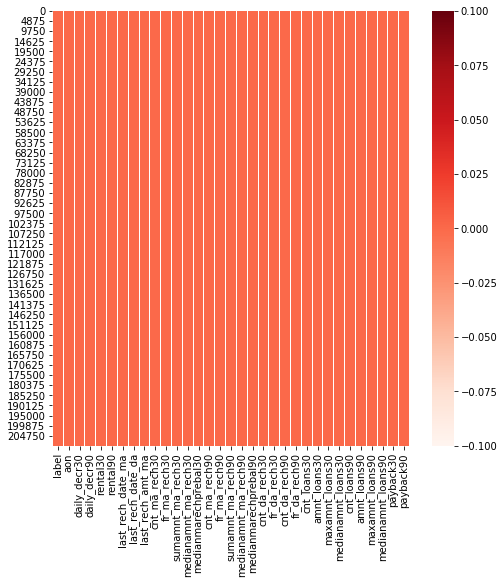

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df1.isnull(),cmap="Reds")
plt.show()

Now lets understand our data statistically

In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


### Preliminary Analysis


1) Maximum features contain continous data

2) In some features Mean is greater than Median which gives us hint that there are outliers present in th dataset

3) Also some features are skewed

4) Also its evident that there are anomally present as age on cellular network days,Daily amount spent from main account, averaged over last 30 days,Daily amount spent from main account, averaged over last 90 days,Average main account balance over last 30 days,Average main account balance over last 90 days,Number of days till last recharge of main account, Number of days till last recharge of data account are negative which can not be in any case

5) In maxamnt_loans30, medianamnt_loans30,maxamnt_loans90, medianamnt_loans90 seems some anomalies which needs to be corrected, that is if we go by defination of loan amount which could be 6 or 12 or zero for some customers.

# Exploratory Data Analysis or EDA

In [24]:
#lets check the point 5 mentioned features individually
df1["maxamnt_loans30"].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
75033.890011         1
90919.615488         1
90459.114378         1
17347.612209         1
67755.334872         1
94938.650685         1
43221.389235         1
78950.334359         1
22061.221605         1
59977.944139         1
76032.753319         1
81381.021186         1
38687.617800         1
54212.692196         1
55999.432557         1
82665.561645         1
38676.756331         1
95886.624904         1
97745.693860         1
13592.120874         1
30287.097017         1
75447.922695         1
20817.527476         1
92871.393228         1
18579.692582         1
44586.318089         1
95609.882399         1
6280.680222          1
80654.956116         1
11905.197983         1
81828.267029         1
84139.104903         1
40570.380180         1
71287.392358         1
33391.803006         1
40618.875959         1
88046.437145         1
72840.474204         1
65632.33404

so basically this needs to be eliminated as we cant replace this by frequently occured no. or with zero because that will highly impact the predictions

In [25]:
df1.drop(df1[(df1['maxamnt_loans30'] != 0) & (df1['maxamnt_loans30']!=6) & (df1['maxamnt_loans30']!=12)].index , inplace= True)


checking again the distribution of 'maxamnt_loans30' feature

In [27]:
df1["maxamnt_loans30"].value_counts()

6.0     179193
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64

In [29]:
df1['maxamnt_loans90'].value_counts()

6     180038
12     26477
0       2031
Name: maxamnt_loans90, dtype: int64

In [30]:
df1['medianamnt_loans90'].value_counts()

0.0    196460
1.0      6120
0.5      5638
2.0       306
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

In [31]:
df1['medianamnt_loans30'].value_counts()

0.0    194487
1.0      7096
0.5      6504
2.0       418
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

Considering them as categorical variable and visuaizing the data distribution

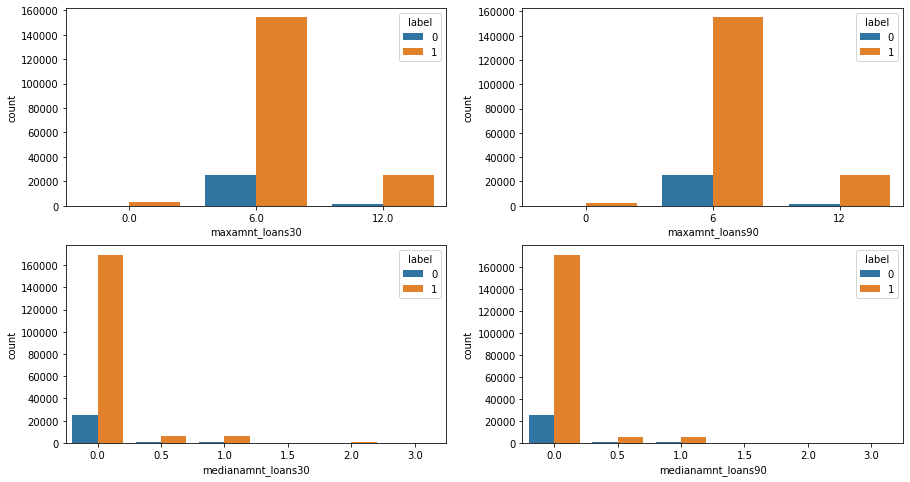

In [32]:
cat=['maxamnt_loans30','maxamnt_loans90','medianamnt_loans30','medianamnt_loans90']
fig,ax=plt.subplots(2,2,figsize=(15,8))
sns.countplot('maxamnt_loans30',hue='label',data=df1,ax=ax[0,0])
sns.countplot('maxamnt_loans90',hue='label',data=df1,ax=ax[0,1])
sns.countplot('medianamnt_loans30',hue='label',data=df1,ax=ax[1,0])
sns.countplot('medianamnt_loans90',hue='label',data=df1,ax=ax[1,1])
plt.show()

Before concluding the above data visualization lets check the data distribution of label

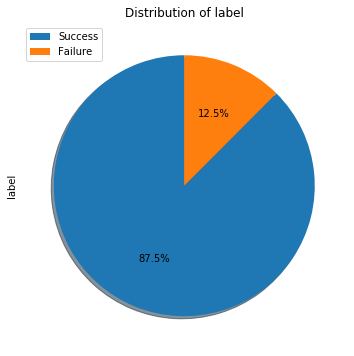

In [33]:
labels= 'Success','Failure'
df1['label'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of label')
plt.legend(labels=labels, loc='upper left') 
plt.show()

In [34]:
df1["label"].value_counts()

1    182513
0     26033
Name: label, dtype: int64

So label feature is imbalanced. 

1) So Max loan amount 6 is more in both 90 and 30 days

### Let's do Univariate & BI-Variate Analysis

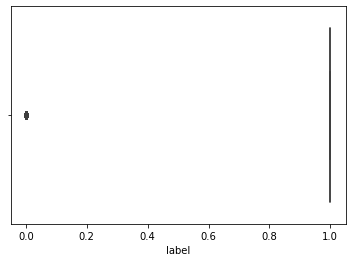

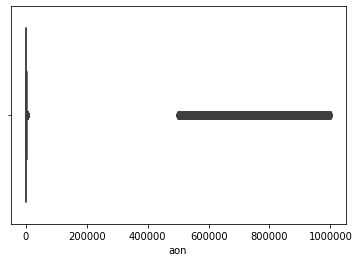

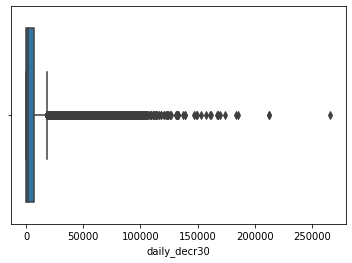

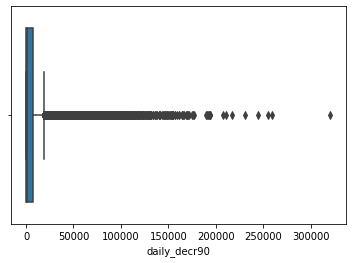

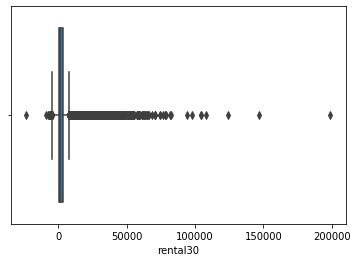

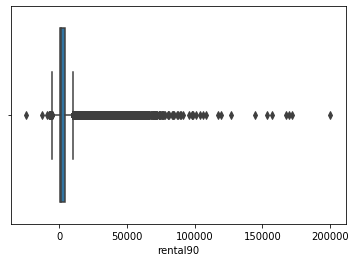

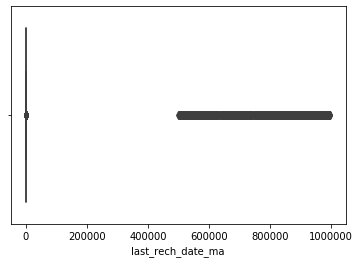

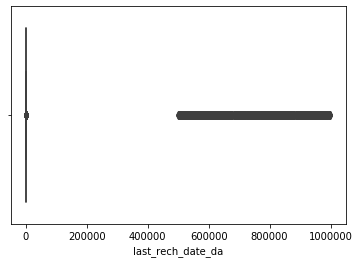

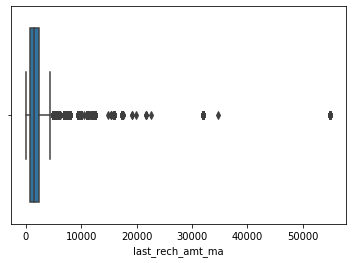

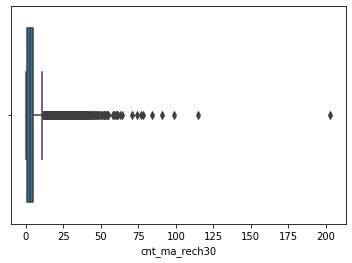

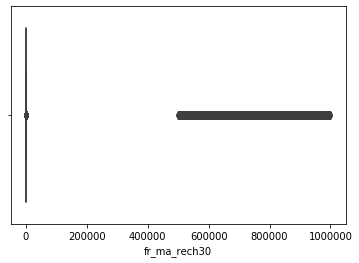

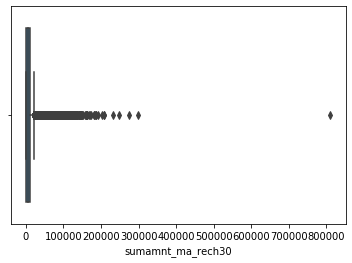

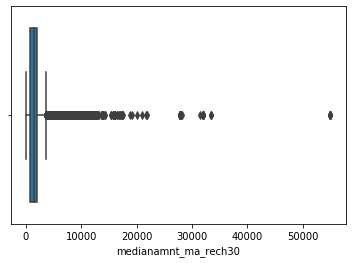

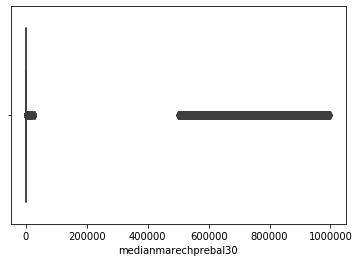

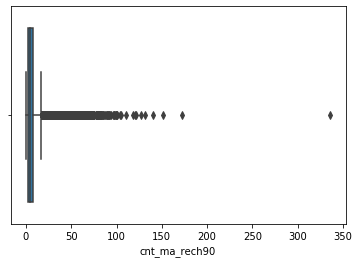

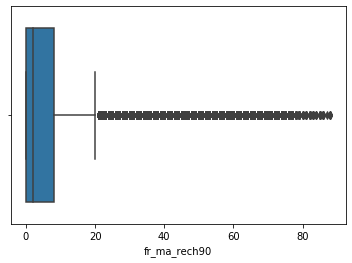

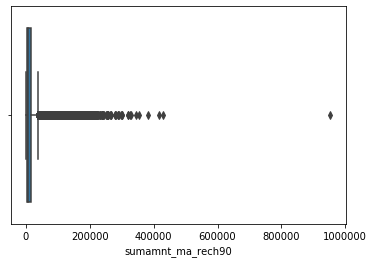

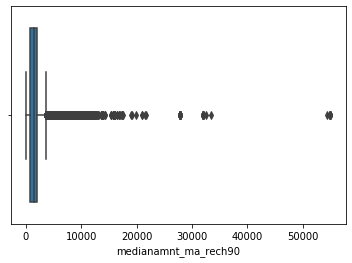

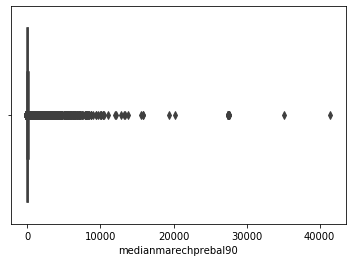

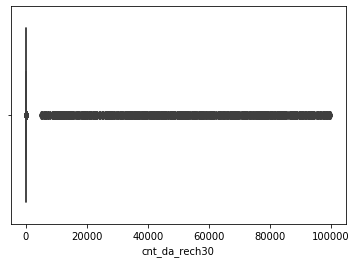

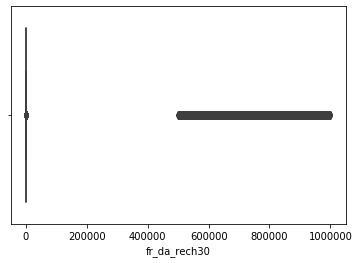

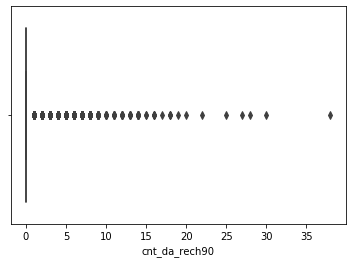

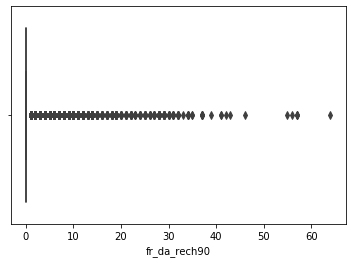

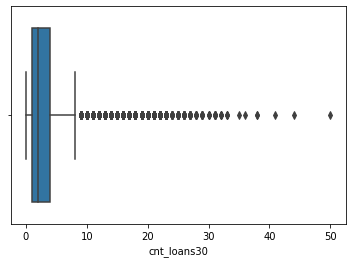

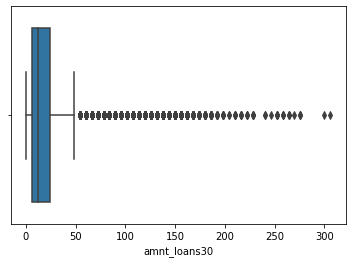

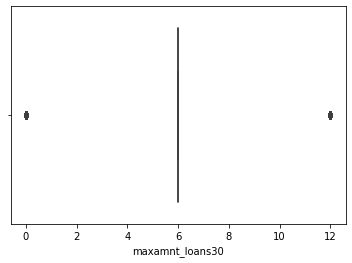

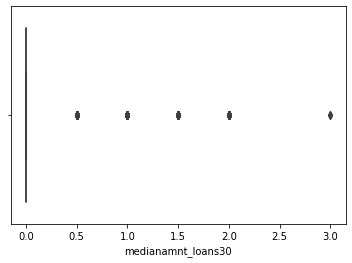

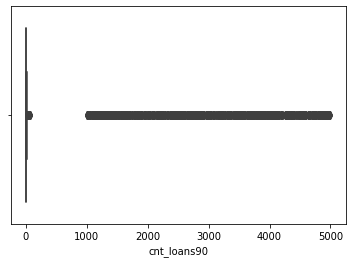

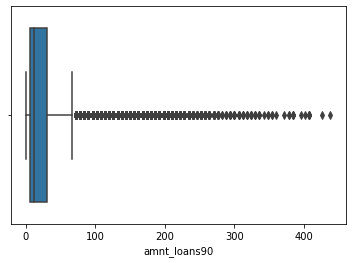

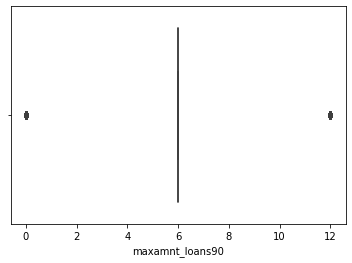

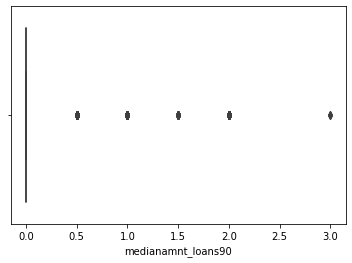

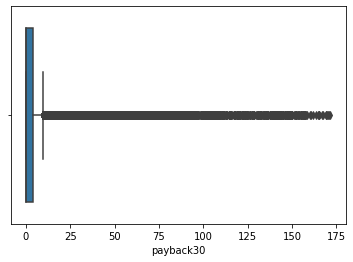

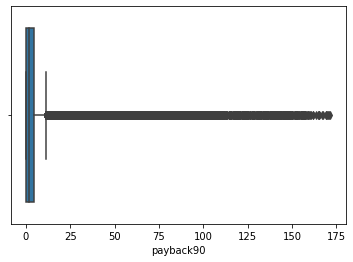

In [35]:
#Plotting box-plot for seeing outiers
for i in df1.columns:
    sns.boxplot(x=df1[i])
    plt.show()

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208546 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 208546 non-null  int64  
 1   aon                   208546 non-null  float64
 2   daily_decr30          208546 non-null  float64
 3   daily_decr90          208546 non-null  float64
 4   rental30              208546 non-null  float64
 5   rental90              208546 non-null  float64
 6   last_rech_date_ma     208546 non-null  float64
 7   last_rech_date_da     208546 non-null  float64
 8   last_rech_amt_ma      208546 non-null  int64  
 9   cnt_ma_rech30         208546 non-null  int64  
 10  fr_ma_rech30          208546 non-null  float64
 11  sumamnt_ma_rech30     208546 non-null  float64
 12  medianamnt_ma_rech30  208546 non-null  float64
 13  medianmarechprebal30  208546 non-null  float64
 14  cnt_ma_rech90         208546 non-null  int64  
 15  

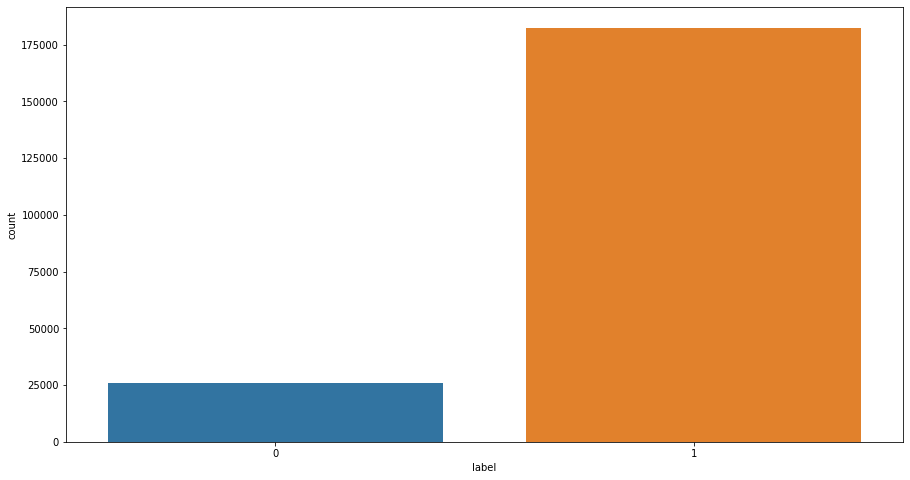

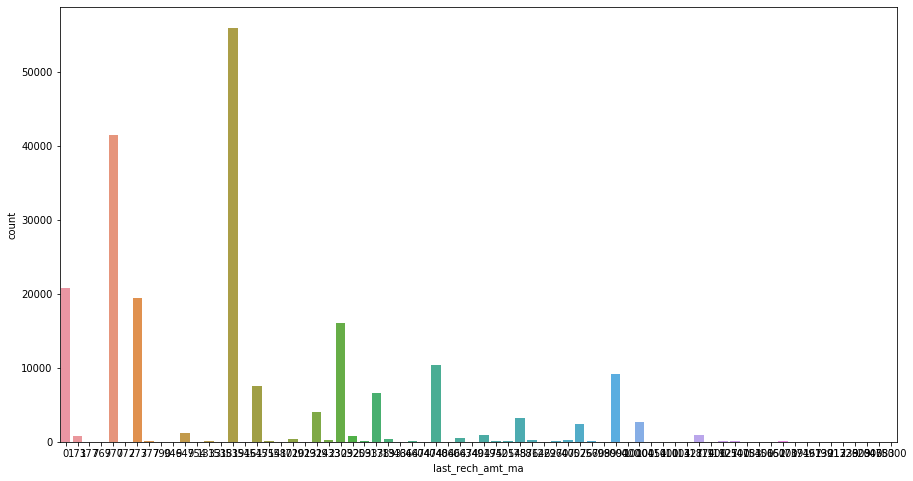

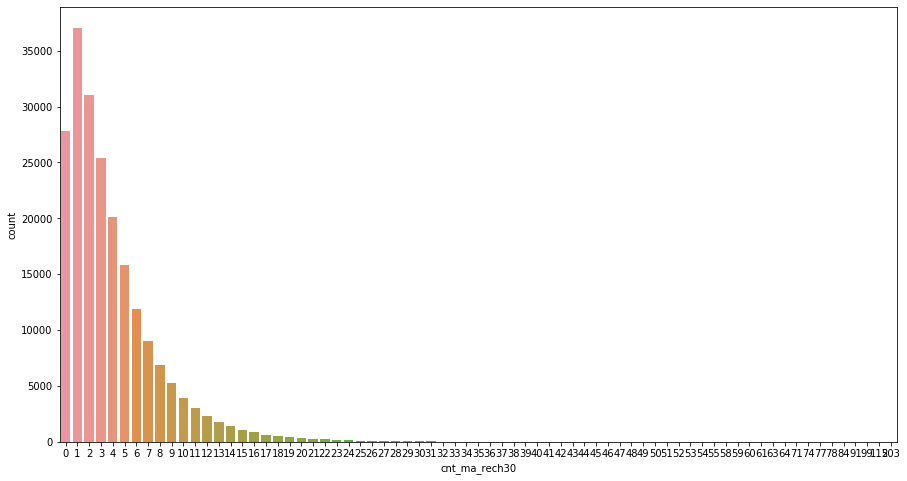

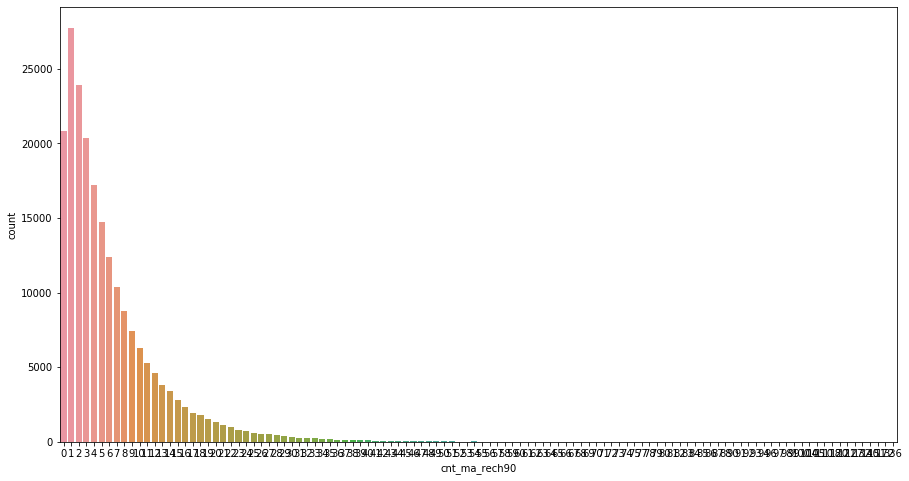

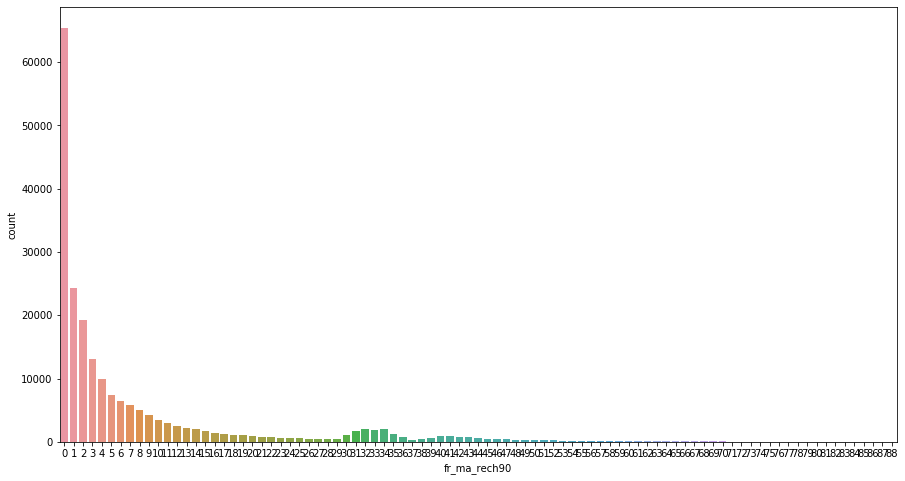

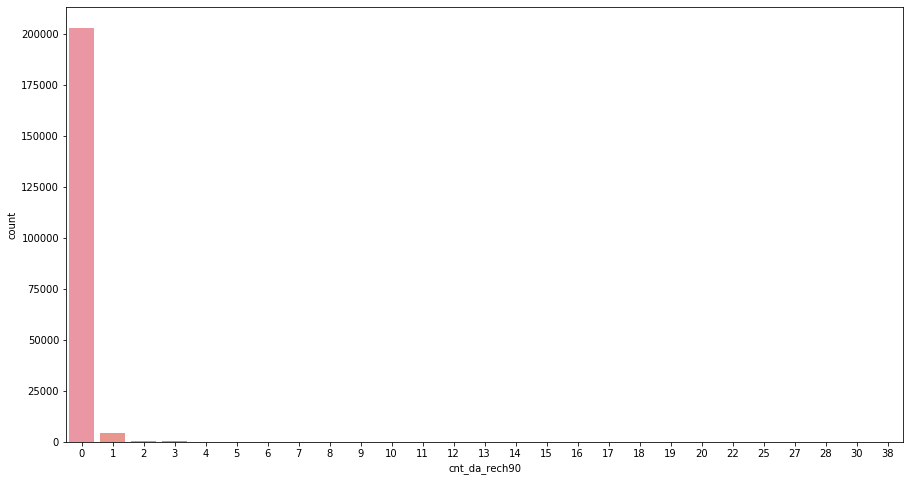

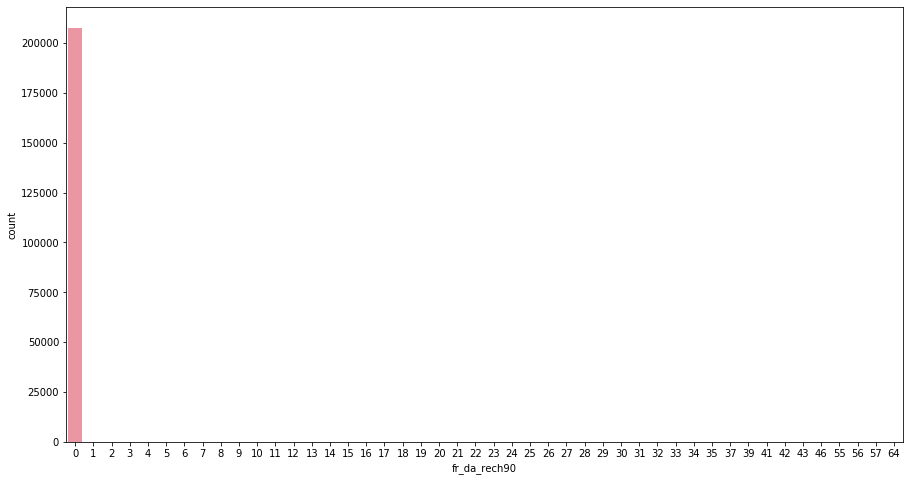

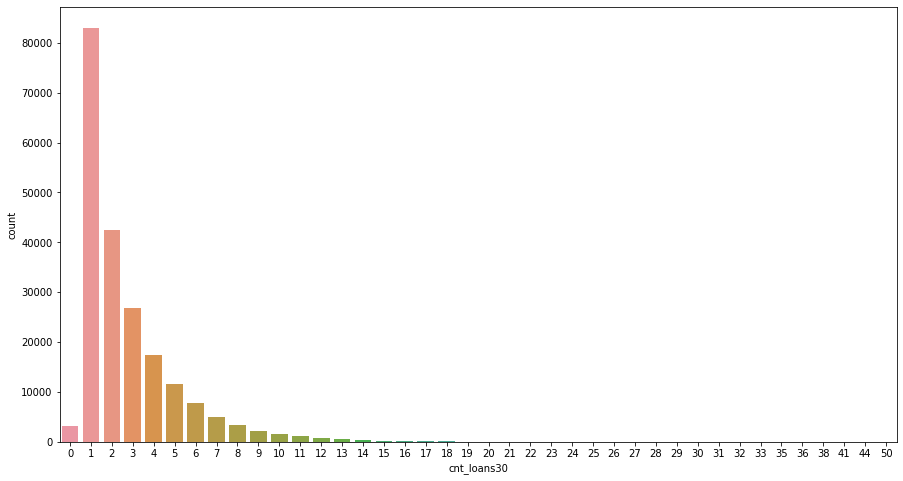

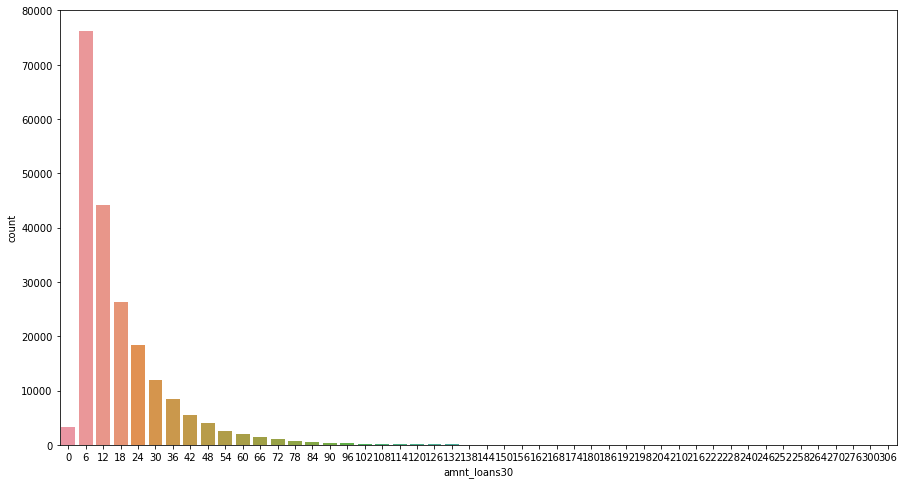

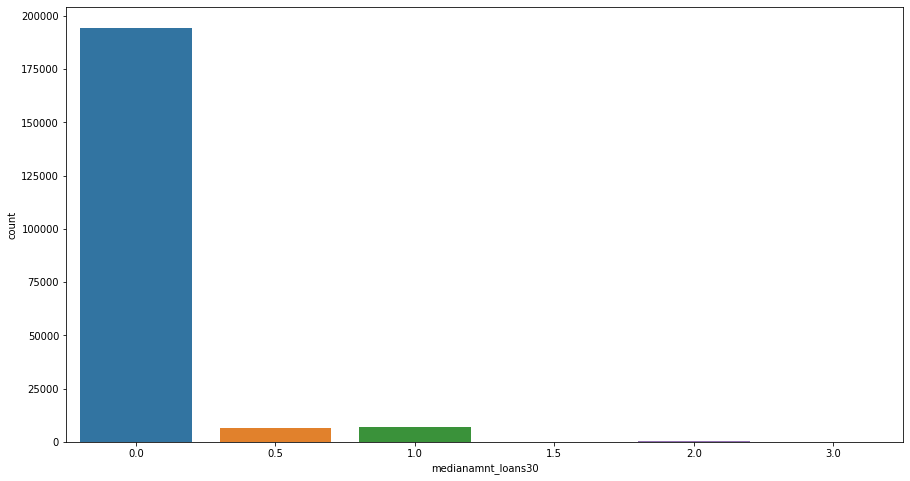

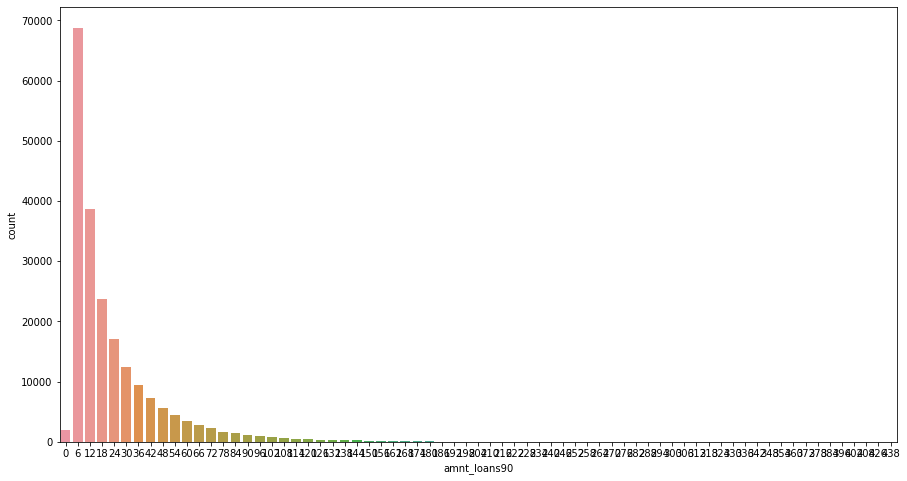

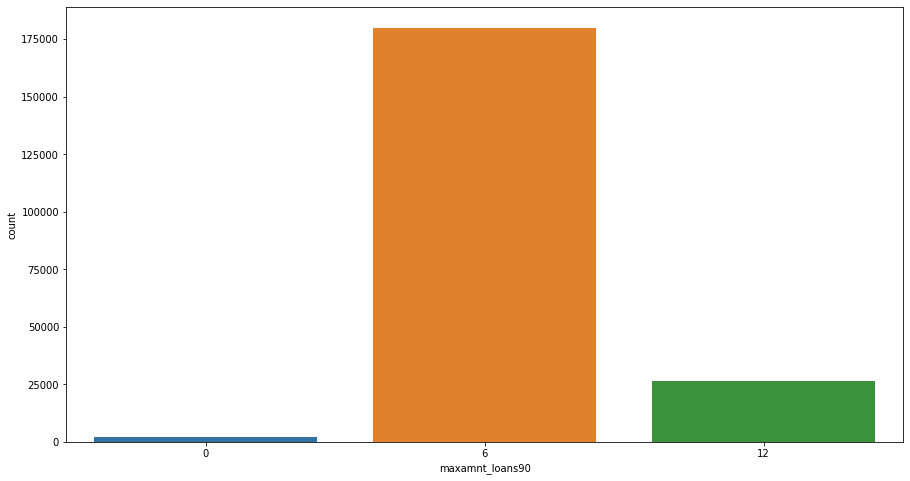

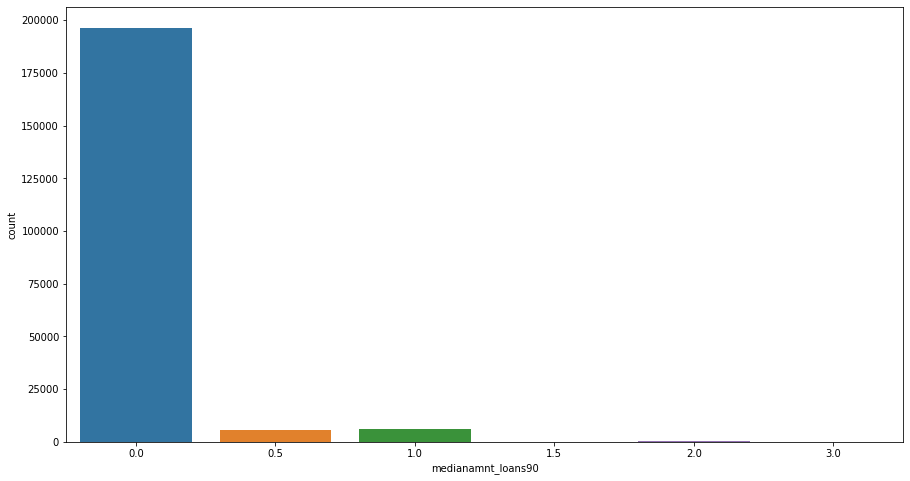

In [37]:
#plotting the countplot of list of features where nunique values are significantly low 
#so seems we can have fair idea about the data distribution.

col1=['label', 'last_rech_amt_ma', 'cnt_ma_rech30','cnt_ma_rech90', 'fr_ma_rech90',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','amnt_loans30',
      'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', ]
for i in col1:
    plt.subplots(figsize=(15,8))
    sns.countplot(i,data=df1)
    plt.show()
    fig.savfig()

It can be Seen many features are skewed


In [38]:
#Checking Co-relation

In [39]:
df1.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003786,0.168217,0.166077,0.057973,0.075421,0.003759,0.001874,0.131552,0.237201,...,0.196170,0.197150,0.074167,0.044536,0.004818,0.199648,0.084053,0.035670,0.048238,0.049131
aon,-0.003786,1.000000,0.001128,0.000380,-0.001056,-0.000896,0.001722,-0.001687,0.004382,-0.003087,...,-0.001768,-0.001668,-0.001420,0.004788,-0.000582,-0.002371,-0.001225,0.002893,0.001888,0.002198
daily_decr30,0.168217,0.001128,1.000000,0.977673,0.441888,0.458730,0.000379,-0.001540,0.275909,0.451438,...,0.366500,0.471860,0.381003,-0.011765,0.009043,0.563801,0.400102,-0.037516,0.026817,0.047039
daily_decr90,0.166077,0.000380,0.977673,1.000000,0.434495,0.471477,0.000843,-0.001790,0.264199,0.426739,...,0.340787,0.448262,0.374448,-0.005794,0.009552,0.567559,0.397173,-0.034921,0.019301,0.040647
rental30,0.057973,-0.001056,0.441888,0.434495,1.000000,0.955230,-0.001039,0.003391,0.127314,0.233137,...,0.180130,0.233307,0.218354,-0.016308,0.004007,0.298752,0.234048,-0.035391,0.072912,0.094912
rental90,0.075421,-0.000896,0.458730,0.471477,0.955230,1.000000,-0.001644,0.002925,0.121523,0.230046,...,0.171550,0.231782,0.229349,-0.009344,0.005158,0.327263,0.250849,-0.034115,0.067016,0.099269
last_rech_date_ma,0.003759,0.001722,0.000379,0.000843,-0.001039,-0.001644,1.000000,0.001821,0.000028,0.004238,...,0.001383,0.001071,-0.001239,0.001181,-0.000187,0.001046,-0.001248,0.002056,-0.002107,-0.001440
last_rech_date_da,0.001874,-0.001687,-0.001540,-0.001790,0.003391,0.002925,0.001821,1.000000,-0.000015,0.001741,...,0.000530,0.000690,0.002533,0.000155,-0.000947,0.000651,0.001614,-0.002155,0.000170,0.000520
last_rech_amt_ma,0.131552,0.004382,0.275909,0.264199,0.127314,0.121523,0.000028,-0.000015,1.000000,-0.002644,...,-0.027510,0.008597,0.137780,0.028506,0.000209,0.014146,0.148400,0.021074,-0.027303,-0.014258
cnt_ma_rech30,0.237201,-0.003087,0.451438,0.426739,0.233137,0.230046,0.004238,0.001741,-0.002644,1.000000,...,0.765861,0.752302,0.173967,-0.066857,0.014885,0.685186,0.174084,-0.071354,0.043586,0.017366


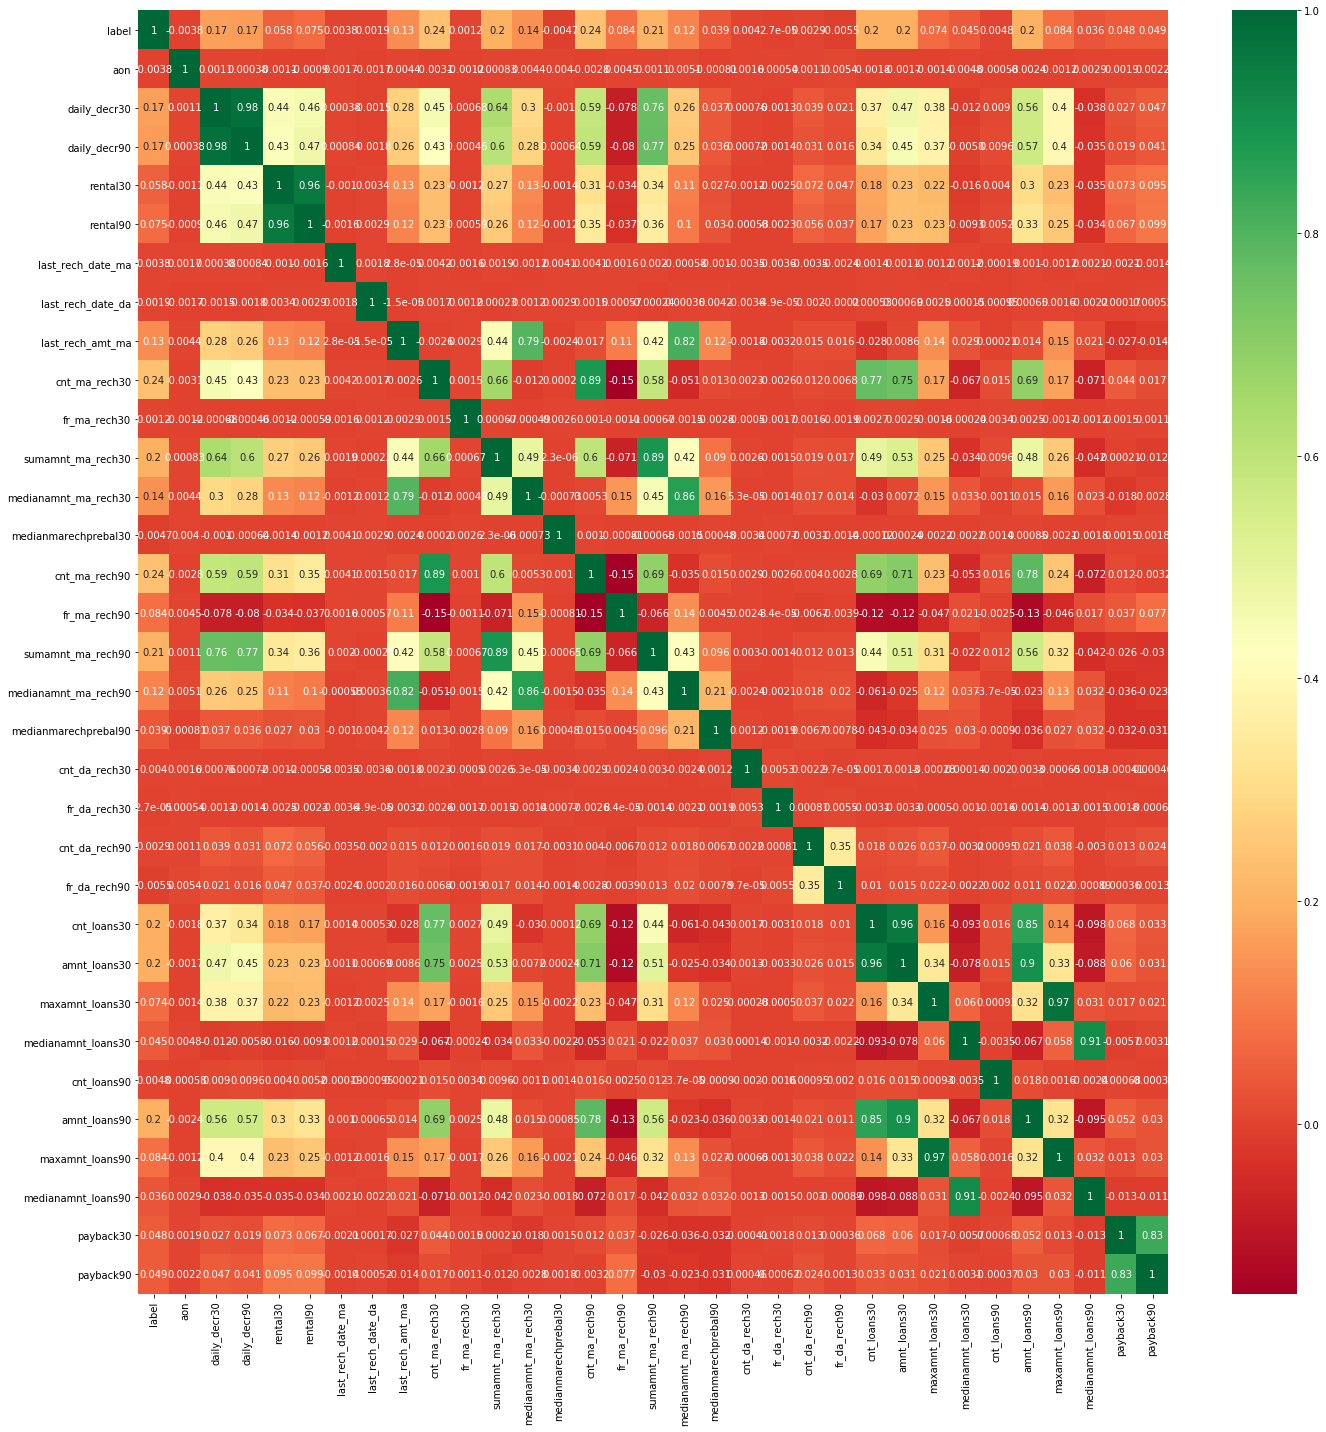

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),cmap="RdYlGn",annot=True)
plt.tight_layout()
plt.show()

As depicted above We can see that there is strong positive as well as negative correlation within features, Also we'll use PCA later to eliminate the curse of dimensionality as well


In [41]:
# Dropping daily_decr90 as it has very high correlation with daily_decr30
df1.drop('daily_decr90',axis=1,inplace=True)
# Dropping rental90 as it has very high correlation with rental30
df1.drop('rental90',axis=1,inplace=True)
# Dropping amnt_loans30 as it has very high correlation with cnt_loans30
df1.drop('amnt_loans30',axis=1,inplace=True)
# Dropping maxamnt_loans90 as it has very high correlation with maxamnt_loans30
df1.drop('maxamnt_loans90',axis=1,inplace=True)
# Dropping medianamnt_loans90 as it has very high correlation with medianamnt_loans30
df1.drop('medianamnt_loans90',axis=1,inplace=True)

In [42]:
#Lets Check the new shape
df1.shape

(208546, 28)

In [43]:
#### We have seen that there are outliers present , Skewness & ofcourse we have to deal with curse of dimensionality

In [44]:

#Removing outliers
from scipy.stats import zscore

z_score=abs(zscore(df1))
threshold = 3
print(np.where(z_score<3))
print(df1.shape)

(array([     0,      0,      0, ..., 208545, 208545, 208545], dtype=int64), array([ 0,  1,  2, ..., 25, 26, 27], dtype=int64))
(208546, 28)


In [45]:
df2 = df1[(z_score<3).all(axis = 1)]

In [46]:
df2.shape

(161797, 28)

In [47]:
print("% Data lost=", (208546-161797)/208546*100)

% Data lost= 22.41663709685153


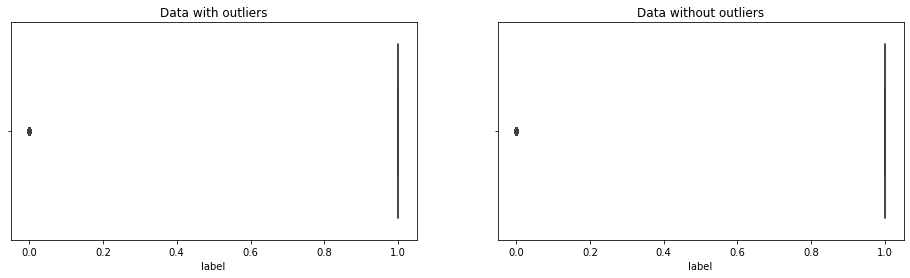

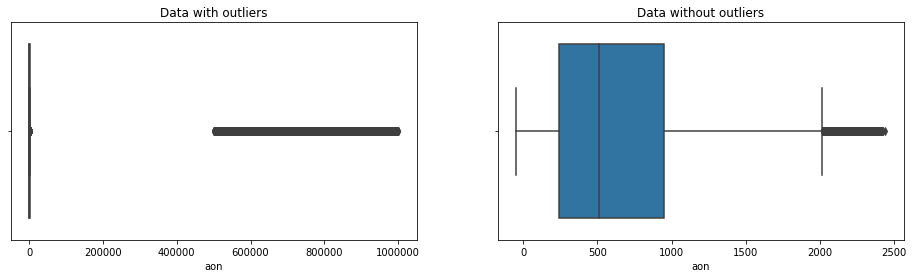

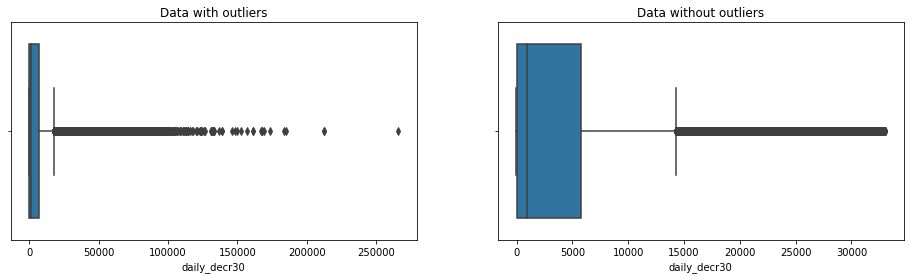

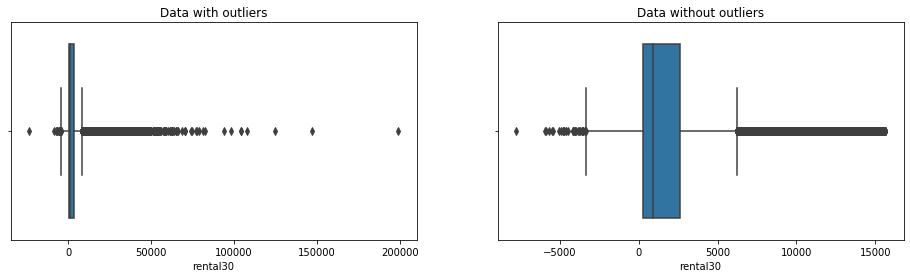

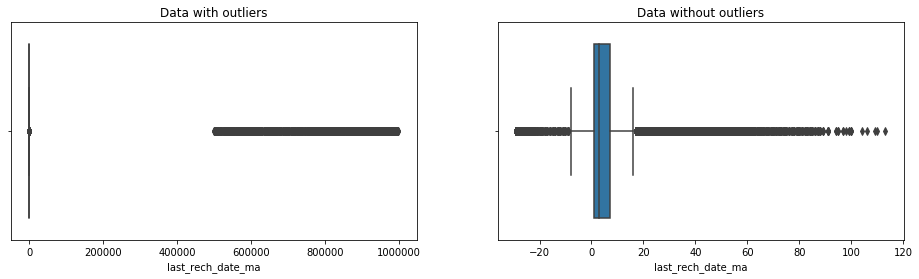

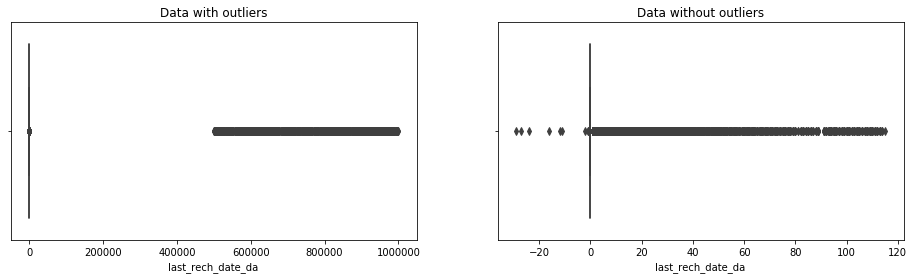

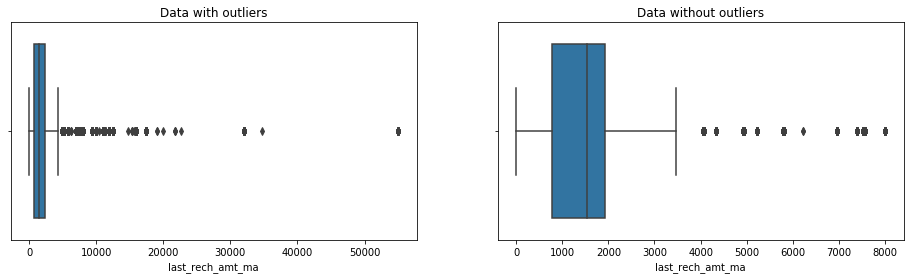

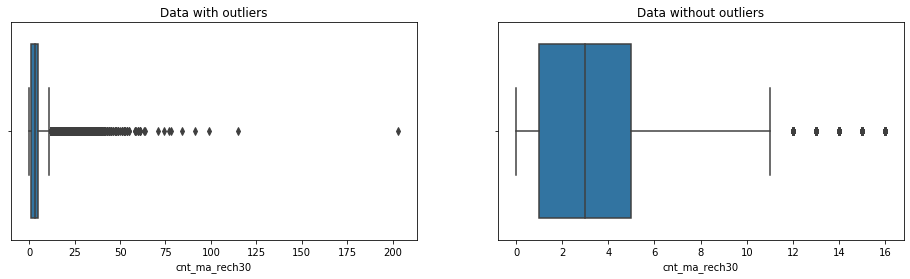

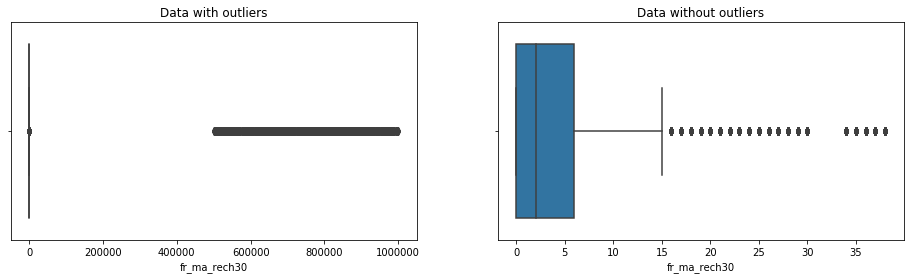

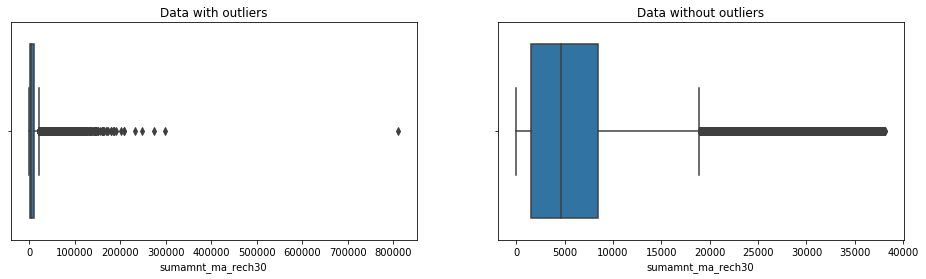

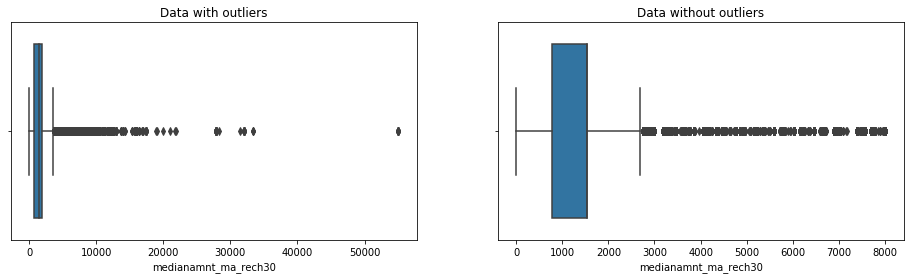

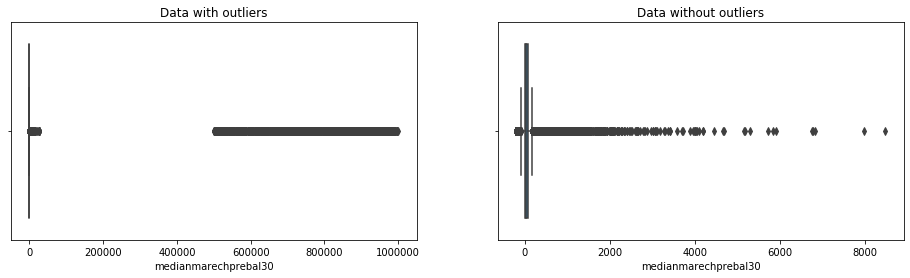

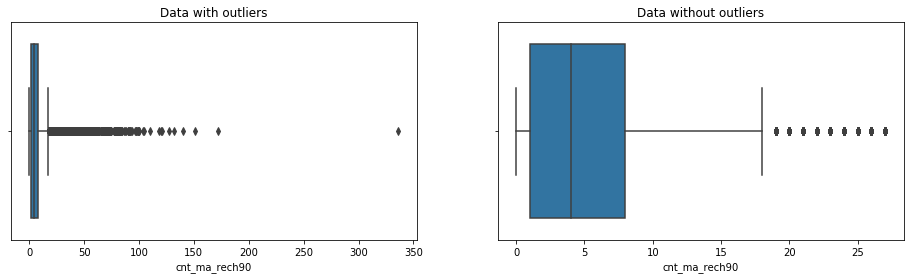

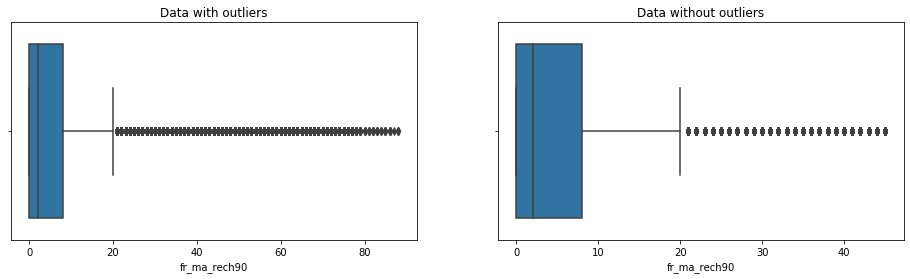

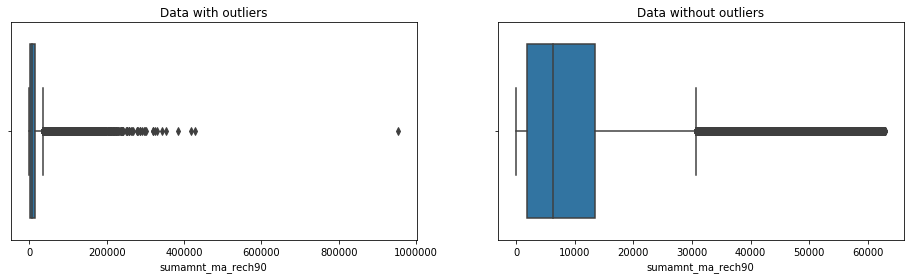

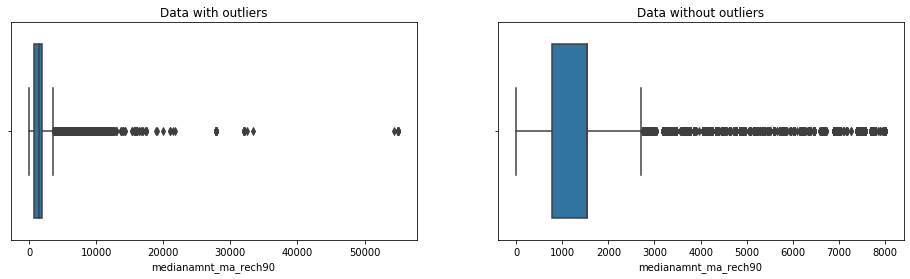

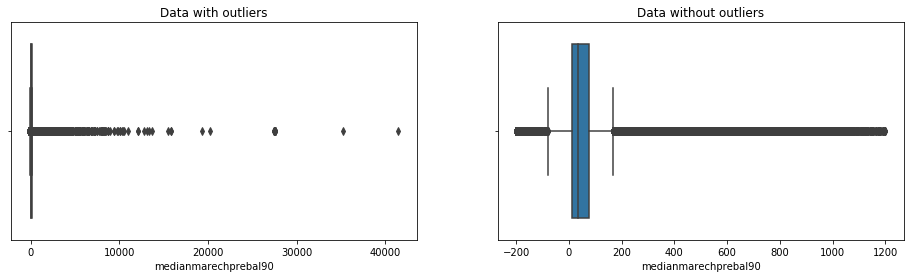

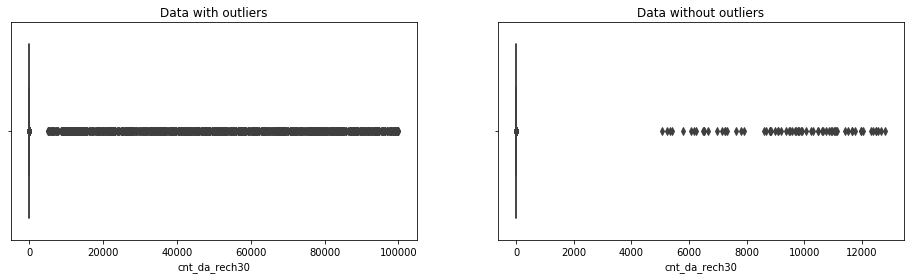

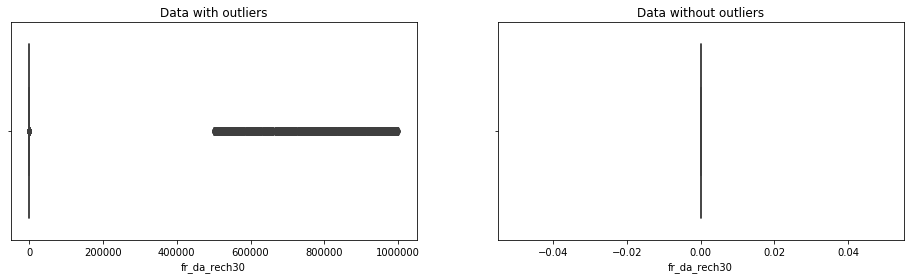

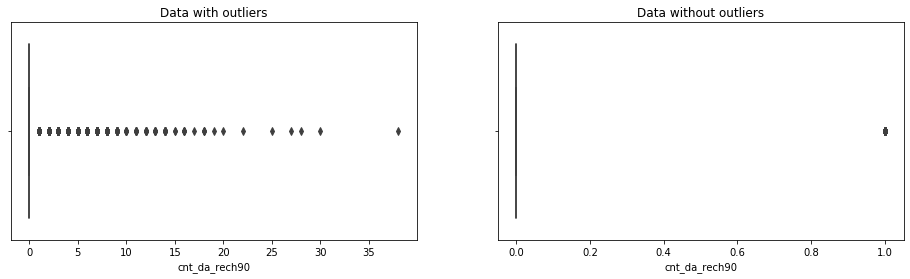

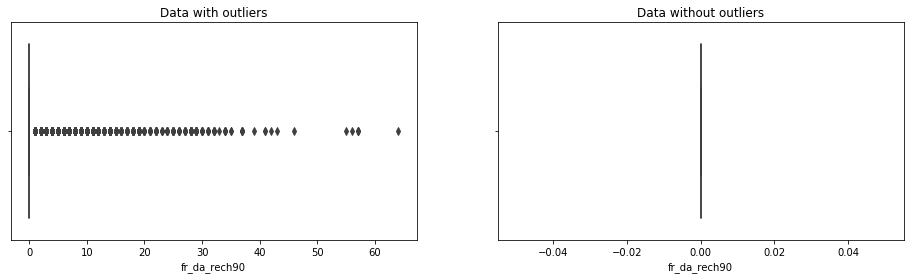

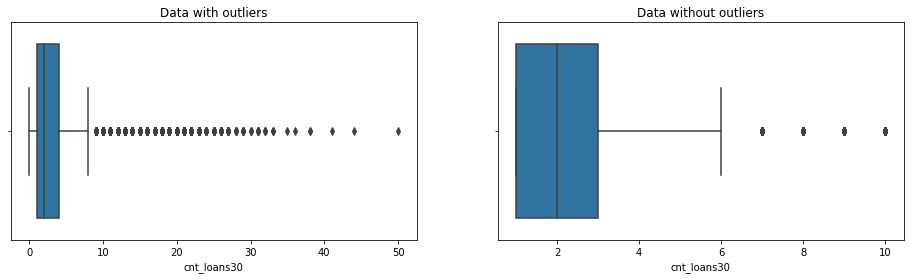

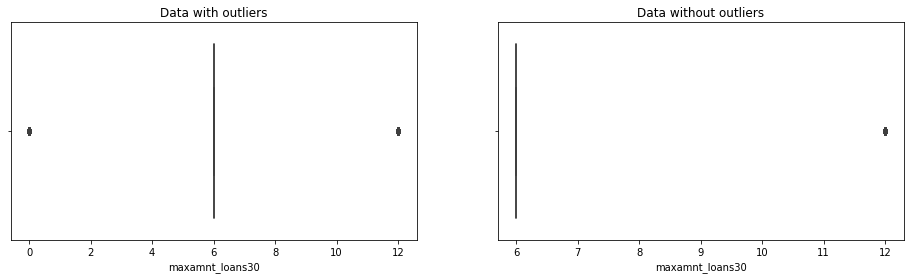

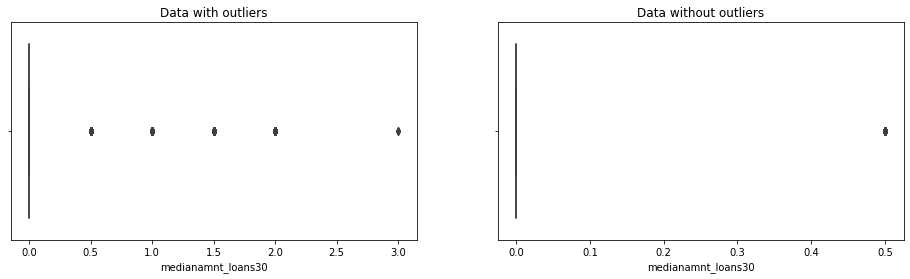

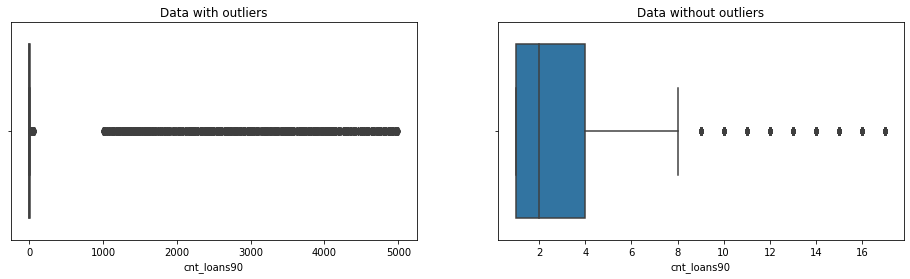

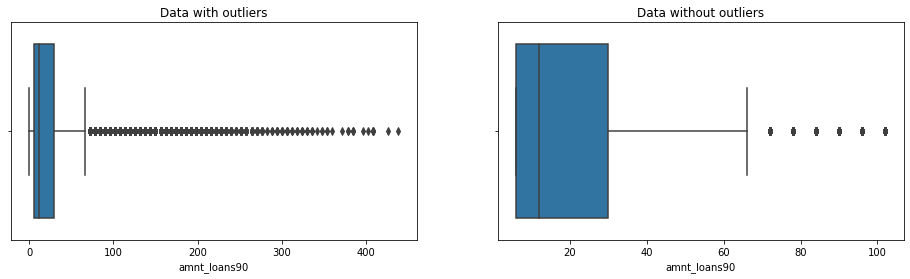

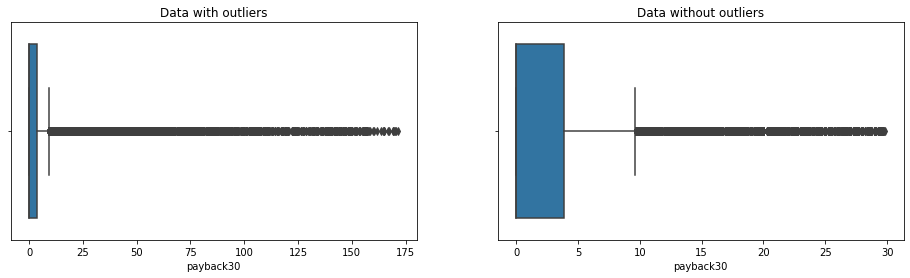

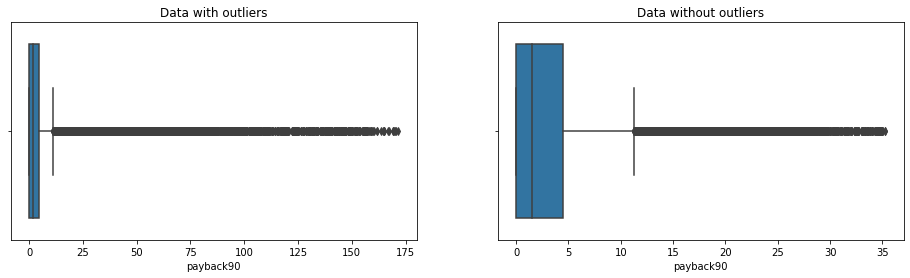

In [50]:
# before and after removing the outliers
for col in df1.columns:
    fig = plt.figure(figsize=(16, 4))
    
    fig.add_subplot(121)
    sns.boxplot(df1[col])
    plt.title('Data with outliers')
    
    fig.add_subplot(122)
    sns.boxplot(df2[col])
    plt.title('Data without outliers')

So basicaly our data cleaning process on outliers worked

In [51]:
##Checking Skewness of cleaned data frame

In [52]:
df2.skew()

label                   -2.093390
aon                      0.958062
daily_decr30             1.977587
rental30                 2.199447
last_rech_date_ma        3.127904
last_rech_date_da       10.379519
last_rech_amt_ma         2.125127
cnt_ma_rech30            1.166980
fr_ma_rech30             2.002607
sumamnt_ma_rech30        1.619822
medianamnt_ma_rech30     2.326565
medianmarechprebal30    10.374495
cnt_ma_rech90            1.314993
fr_ma_rech90             1.993359
sumamnt_ma_rech90        1.721485
medianamnt_ma_rech90     2.374643
medianmarechprebal90     3.693868
cnt_da_rech30           50.891364
fr_da_rech30             0.000000
cnt_da_rech90            6.923330
fr_da_rech90             0.000000
cnt_loans30              1.471377
maxamnt_loans30          2.632069
medianamnt_loans30       5.286458
cnt_loans90              1.688924
amnt_loans90             1.697450
payback30                2.602632
payback90                2.533103
dtype: float64

In [83]:
df4=np.cbrt((df2))

In [84]:
df4.skew()

label                   -2.093390
aon                     -0.563468
daily_decr30             0.458182
rental30                -0.096970
last_rech_date_ma       -0.517731
last_rech_date_da        7.306268
last_rech_amt_ma        -0.694526
cnt_ma_rech30           -0.806411
fr_ma_rech30             0.113325
sumamnt_ma_rech30       -0.558310
medianamnt_ma_rech30    -0.764762
medianmarechprebal30     0.006733
cnt_ma_rech90           -0.663154
fr_ma_rech90             0.295965
sumamnt_ma_rech90       -0.416165
medianamnt_ma_rech90    -0.803471
medianmarechprebal90    -0.269871
cnt_da_rech30           44.862713
fr_da_rech30             0.000000
cnt_da_rech90            6.923330
fr_da_rech90             0.000000
cnt_loans30              0.728293
maxamnt_loans30          2.632069
medianamnt_loans30       5.286458
cnt_loans90              0.753929
amnt_loans90             0.743773
payback30                0.428938
payback90                0.301620
dtype: float64

In [91]:
# Let's Separate our dataset into Features and target
x=df4.drop(columns=["label"])
y=df4[["label"]]

In [92]:
x.shape

(161797, 27)

In [93]:
y.shape

(161797, 1)

## Feature scaling 

In [94]:
# scaling using standard scaler :
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

In [95]:
# PCA is required for the analysis to reduce curse of Dimensionality
from sklearn.decomposition import PCA
for i in range(5,27):
    pca = PCA(n_components=i)
    x1_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

5  variance :0.6769227902049699
6  variance :0.7203882603178947
7  variance :0.7605548181300459
8  variance :0.7995797977125941
9  variance :0.8381345521742103
10  variance :0.8702802251685684
11  variance :0.8998985954799987
12  variance :0.9247597763121016
13  variance :0.9413674682759218
14  variance :0.9563342037124957
15  variance :0.968699298637019
16  variance :0.9767747625781356
17  variance :0.9818653729133031
18  variance :0.9859216859265727
19  variance :0.9893972619683544
20  variance :0.9927207220256812
21  variance :0.9959200279779721
22  variance :0.9984576642298981
23  variance :0.9996894643934583
24  variance :0.9999088161811003
25  variance :1.0
26  variance :1.0


In [96]:
# We find that after 13 the variance is >95%. Let's use n=13
pca = PCA(n_components=13)
x=pca.fit_transform(x)

In [97]:
x.shape

(161797, 13)

## Model Building

In [107]:
# IMPORTING model building libraries :
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,f1_score
from sklearn.model_selection import cross_val_score

#### hyper-parameter tuning

In [109]:
# random forest calssifier
rfr=RandomForestClassifier()
parameters={'n_estimators':[1,10,50,100]}
clfr=GridSearchCV(rfr,parameters ,scoring='accuracy', cv=10)
clfr.fit(x,y)
clfr.best_params_


{'n_estimators': 100}

In [110]:

## decision tree classifier
dtc=DecisionTreeClassifier()
param={'criterion':['gini','entropy']}
clf=GridSearchCV(dtc,param)
clf.fit(x,y)
clf.best_params_

{'criterion': 'entropy'}

In [111]:
# LogisticRegression
lg=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
clf=GridSearchCV(lg,grid)
clf.fit(x,y)
clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [112]:
ada=AdaBoostClassifier()
parameters={'n_estimators':[10,20,50,100],'learning_rate':[0.001,0.01,0.1]}
clf=GridSearchCV(ada,parameters)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

### Evaluating the best Random state for the model at which the accuracy score must be highest :


In [114]:
def max_acc_Score(classifier,x_new,y):
    max_r_score=0
    for r_state in range(42,90):
        x_train, x_test, y_train, y_test=train_test_split(x_new,y,random_state=r_state,test_size=0.22)
        classifier.fit(x_train,y_train)
        y_pred=classifier.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        print('accuracy score corr to random state',r_state,'is:',acc_scr)
        if acc_scr>max_r_score:
            max_r_score=acc_scr
            final_r_state=r_state
    print()
    print()
    print("max acc score corr to ",final_r_state,'is',max_r_score)       
    return final_r_state

In [115]:
#finding best rstate and acc score  for random forest classifier:
rfc=RandomForestClassifier(n_estimators=100)
r_state=max_acc_Score(rfc,x,y)


accuracy score corr to random state 42 is: 0.8984717383975728
accuracy score corr to random state 43 is: 0.8992864366782785
accuracy score corr to random state 44 is: 0.901365321946286
accuracy score corr to random state 45 is: 0.8983593662209237
accuracy score corr to random state 46 is: 0.8990055062366558
accuracy score corr to random state 47 is: 0.8988931340600067
accuracy score corr to random state 48 is: 0.9017867176087201
accuracy score corr to random state 49 is: 0.8992864366782785
accuracy score corr to random state 50 is: 0.8986122036183841
accuracy score corr to random state 51 is: 0.897432295763569
accuracy score corr to random state 52 is: 0.8986122036183841
accuracy score corr to random state 53 is: 0.8976570401168671
accuracy score corr to random state 54 is: 0.8985841105742218
accuracy score corr to random state 55 is: 0.8980503427351387
accuracy score corr to random state 56 is: 0.8992302505899539
accuracy score corr to random state 57 is: 0.9018148106528824
accuracy s

In [116]:
# Finally splitting the data as per above results into train test data :
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=57)

In [117]:
#Models tunned as per above result
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier(criterion='entropy')
lg=LogisticRegression(penalty='l2')
ada=AdaBoostClassifier(learning_rate=0.1,n_estimators=100)



In [118]:

models = []
models.append(('randomforestclassifier', rfc))
models.append(('decisiontreeclassifier', dtc))
models.append(('logistic regression', lg))
models.append(('ada boost classifier', ada))

******************* randomforestclassifier *******************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy_Score =  0.9015900662995843


f1 score:  0.9448233496621357


Cross_Val_Score =  0.8997323660644195




Classification_report
               precision    recall  f1-score   support

         0.0       0.75      0.43      0.55      4895
         1.0       0.91      0.98      0.94     30701

    accuracy                           0.90     35596
   macro avg       0.83      0.7

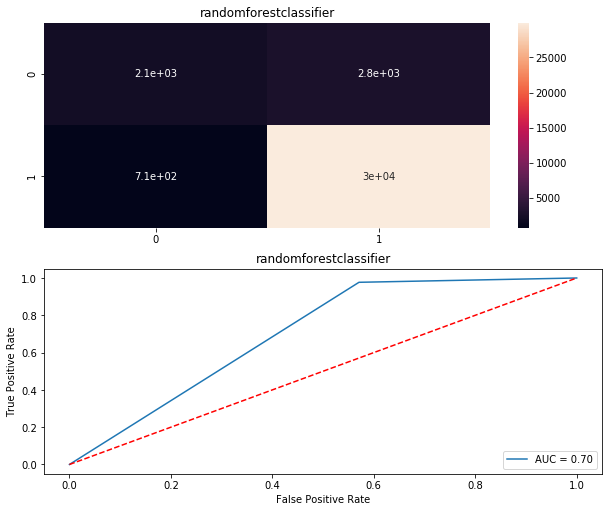

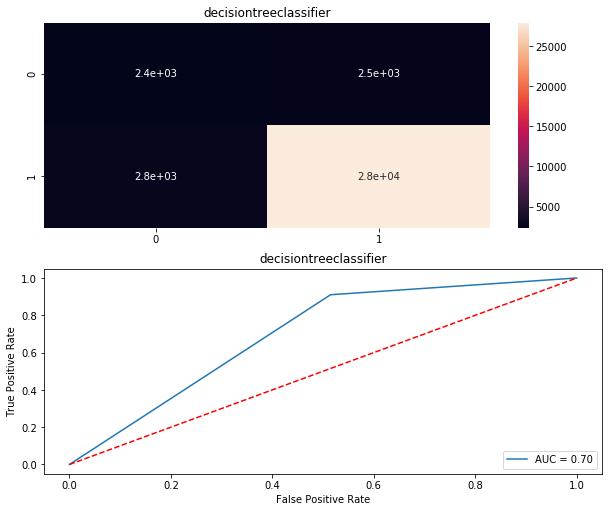

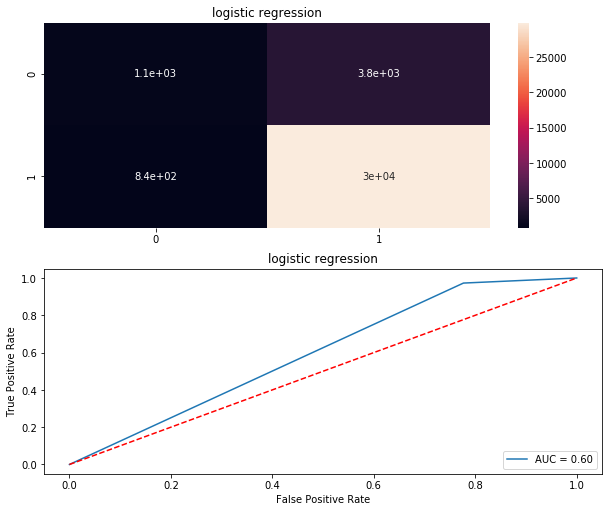

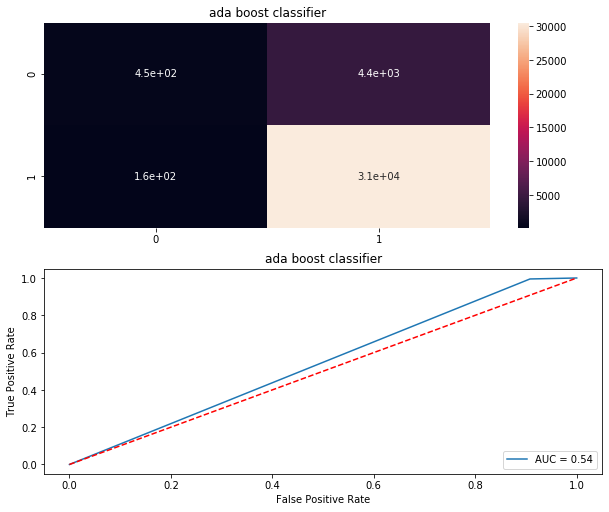

In [119]:
# Calling out the accuracy score , auc roc score , cross validation score and the classification metrices for the models :
Model = []
score = []
cvs=[]
rocscore=[]
F1score=[]
for name,model in models:
    print('*******************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_Score = ',AS)
    score.append(AS*100)
    print('\n')
    f1 = f1_score(y_test,pre)
    print("f1 score: ",f1)
    F1score.append(f1*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('\n')
    print('Classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')  
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [120]:

# displaying the results into a dataframe :

result=pd.DataFrame({'model':Model,'F1 score':F1score,'Accu_score':score,'cross_val_Score':cvs})
result

,model,F1 score,Accu_score,cross_val_Score
0,randomforestclassifier,94.482335,90.159007,89.973237
1,decisiontreeclassifier,91.374293,85.178110,85.154236
2,logistic regression,92.794556,86.970446,86.959587
3,ada boost classifier,92.989267,87.063153,86.978745


In [122]:

# predicting results using that :
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
ac_score=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
print("f1 score :",f1)
print('\n') 
print('Accuracy Score :',ac_score*100)
print('\n') 
print('cross validation score :',cross_val_score(dtc, x, y, cv=10, scoring='accuracy').mean())
print('\n')
print('confusion matrix :',confusion_matrix(y_test,pred))
print('\n') 
print('Classification report :',classification_report(y_test,pred))

f1 score : 0.9447823757445869


Accuracy Score : 90.1561973255422


cross validation score : 0.8508130555174187


confusion matrix : [[ 2115  2780]
 [  724 29977]]


Classification report :               precision    recall  f1-score   support

         0.0       0.74      0.43      0.55      4895
         1.0       0.92      0.98      0.94     30701

    accuracy                           0.90     35596
   macro avg       0.83      0.70      0.75     35596
weighted avg       0.89      0.90      0.89     35596



In [123]:
pred_prob = rfc.predict_proba(x_test)[:,1]
pred_prob

array([0.8 , 0.86, 0.97, ..., 0.99, 0.99, 0.08])

In [124]:

fpr,tpr,thresholds = roc_curve(y_test,pred_prob)
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.00960163 0.02042901 0.03329928 0.03329928 0.05168539
 0.06639428 0.08110317 0.08110317 0.09928498 0.11624106 0.11624106
 0.1319714  0.1319714  0.1319714  0.1319714  0.14668029 0.14688458
 0.16036772 0.16036772 0.17773238 0.18917263 0.18917263 0.20572012
 0.20572012 0.21899898 0.21920327 0.21920327 0.23248212 0.23248212
 0.24473953 0.24473953 0.25495403 0.26721144 0.26721144 0.2825332
 0.28273749 0.29417773 0.29417773 0.30806946 0.30806946 0.32134831
 0.33278856 0.33278856 0.34198161 0.35362615 0.36404494 0.37609806
 0.3875383  0.39754852 0.39775281 0.40694586 0.40694586 0.41695608
 0.42717058 0.43738509 0.43779367 0.44637385 0.45556691 0.45556691
 0.4557712  0.45597549 0.45597549 0.46353422 0.47252298 0.48192033
 0.49090909 0.49989785 0.49989785 0.50827375 0.50847804 0.51562819
 0.51583248 0.52175689 0.52196118 0.53074566 0.53094995 0.54055158
 0.546476   0.54668029 0.55342186 0.56057201 0.56098059 0.56772217
 0.56792646 0.573238   0.57344229 0.58202247 0.5875383  0.59427

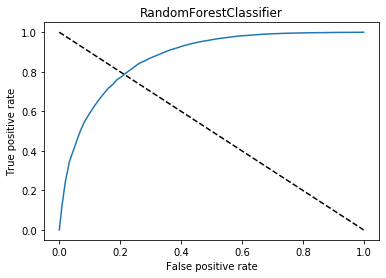

In [125]:

#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [126]:
#save the model as a pickel in a file
from sklearn.externals import joblib
joblib.dump(rfc,'Micro-Credit Model.pkl')

['Micro-Credit Model.pkl']